In [2]:
import matplotlib
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import string
import random
import nltk
from nltk.stem import WordNetLemmatizer

print(tf.__version__)

2.14.0


In [3]:
with open('intents_exercise.json', encoding='utf-8') as file:
    data = json.load(file)
    print(data)

{'intents': [{'tag': 'hello', 'patterns': ['Hello', 'Hi there', 'Good morning', "What's up", 'Hey', 'Hi', 'Greetings', 'Howdy'], 'responses': ['Hey!', 'Hello', 'Hi!', 'Good morning!', 'Hey there!', 'Hi, nice to meet you!'], 'context': ''}, {'tag': 'noanswer', 'patterns': [], 'responses': ["Sorry, can't understand you", 'Please give me more info', 'Not sure I understand'], 'context': ['']}, {'tag': 'job', 'patterns': ['What is your job', 'What is your work', 'What do you do', 'Tell me about your job'], 'responses': ['My job is to make you feel like everything is okay.', 'I work to serve you as well as possible'], 'context': ''}, {'tag': 'age', 'patterns': ['What is your age', 'How old are you', 'When were you born'], 'responses': ['I was born in 2021'], 'context': ''}, {'tag': 'feeling', 'patterns': ['How are you today', 'How are you', 'How do you feel', "What's your mood", 'Are you feeling okay'], 'responses': ['I am feeling good, you?', 'Very good and you?', "Actually, I'm okay and yo

In [4]:
# Creating data X and data Y
words = []  # For BoW model/ vocabulary for patterns
classes = []  # For BoW model/ vocabulary for tags
data_X = []  # For storing each pattern
data_y = []  # For storing tag corresponding to each pattern in data_X

# Iterating over all the intents
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        # Tokenize each pattern
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)  # Append tokens to words
        data_X.append(pattern)  # Appending pattern to data_X
        data_y.append(intent["tag"])  # Appending the associated tag to each pattern

        # Adding the tag to the classes if it's not there already
        if intent["tag"] not in classes:
            classes.append(intent["tag"])

# Initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()

# Lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]

# Sorting the vocab and classes in alphabetical order and taking the set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

# Save the variables to a Python file
with open('variables.py', 'w') as f:
    f.write(f'words = {words}\n')
    f.write(f'classes = {classes}\n')
    f.write(f'data_X = {data_X}\n')

In [19]:
training = []
out_empty = [0] * len(classes)

# Creating the bag of words model
for idx, doc in enumerate(data_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)

    # Mark the index of class that the current pattern is associated to
    output_row = list(out_empty)
    output_row[classes.index(data_y[idx])] = 1

    # Add the one hot encoded BoW and associated classes to training
    training.append([bow, output_row])

# Shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)

# Split the features and target labels
train_X = np.array(list(training[:, 0]))
train_Y = np.array(list(training[:, 1]))


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Create the Neural Network Model
model = Sequential()
model.add(Dense(128, input_shape=(len(train_X[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_Y[0]), activation="softmax"))

# Configure the optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
history = model.fit(x=train_X, y=train_Y, epochs=500, validation_split=0.2, verbose=1)


Epoch 1/500
4/4 [==============================] - 1s 64ms/step - loss: 2.7260 - accuracy: 0.1000 - val_loss: 2.7283 - val_accuracy: 0.0769
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 2.6738 - accuracy: 0.1400 - val_loss: 2.7457 - val_accuracy: 0.0769
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 2.5196 - accuracy: 0.1700 - val_loss: 2.7500 - val_accuracy: 0.0769
Epoch 4/500
4/4 [==============================] - 0s 15ms/step - loss: 2.5251 - accuracy: 0.1400 - val_loss: 2.6820 - val_accuracy: 0.1154
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 2.3921 - accuracy: 0.1800 - val_loss: 2.6182 - val_accuracy: 0.0769
Epoch 6/500
4/4 [==============================] - 0s 13ms/step - loss: 2.3519 - accuracy: 0.1300 - val_loss: 2.5148 - val_accuracy: 0.0769
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 2.2759 - accuracy: 0.1700 - val_loss: 2.4915 - val_accuracy: 0.0769
Epoch 8/500
4/4 [===

In [21]:
model.save("chatbot_AI.h5")

c:\Users\Daniel Maheswara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Last Epoch: Loss=0.6351708173751831, Acc=0.7400000095367432, Val Loss=0.7424576878547668, Val Acc=0.6538461446762085


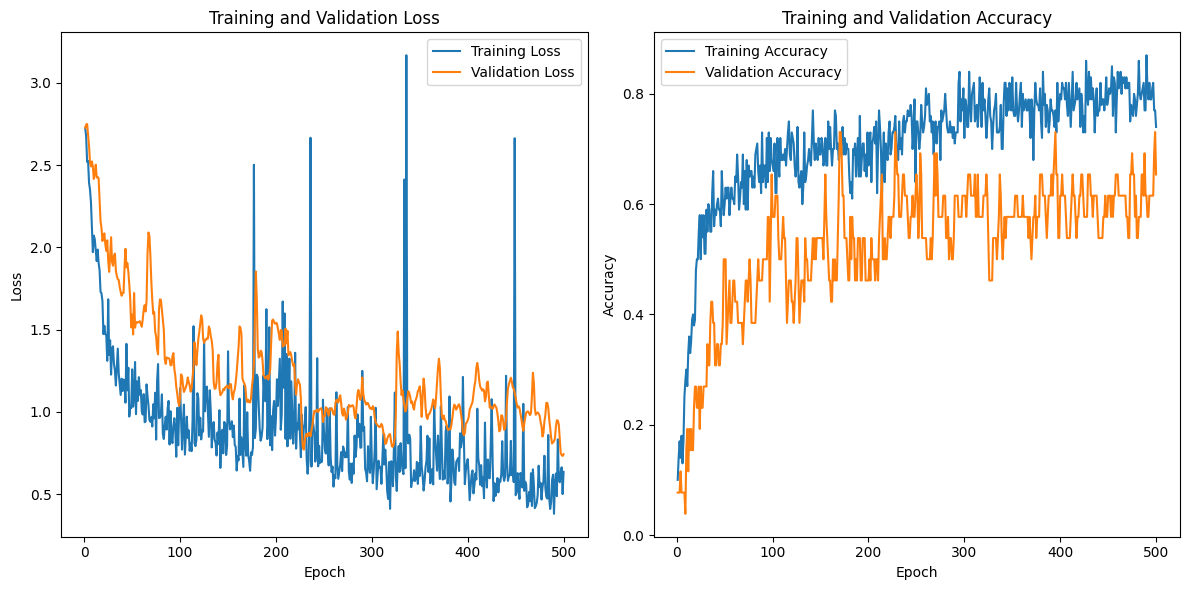

In [22]:
# Get the training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print the last epoch's metrics
last_epoch = len(train_loss)
print(f"Last Epoch: Loss={train_loss[last_epoch-1]}, Acc={train_acc[last_epoch-1]}, Val Loss={val_loss[last_epoch-1]}, Val Acc={val_acc[last_epoch-1]}")

plt.figure(figsize=(12, 6))
# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [5]:
from tensorflow.keras.models import load_model

lemmatizer = WordNetLemmatizer()

model = load_model("./chatbot_AI.h5")


def clean_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def bag_of_words(text, vocab):
    tokens = clean_text(text)
    bow = [0] * len(vocab)
    for word in tokens:
        for idx, w in enumerate(vocab):
            if w == word:
                bow[idx] = 1
    return np.array(bow)

def pred_class(text, vocab, labels, model):
    bow = bag_of_words(text, vocab)
    result = model.predict(np.array([bow]))[0]
    thresh = 0.5
    y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]
    y_pred.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in y_pred:
        return_list.append(labels[r[0]])
    return return_list

def get_response(intents_list, intents_json):
    if not intents_list:
        return "Sorry! I don't understand."
    else:
        tag = intents_list[0]
        list_of_intents = intents_json["intents"]
        for i in list_of_intents:
            if i["tag"] == tag:
                result = random.choice(i["responses"])
                break
        return result


In [10]:
import pyttsx3
import speech_recognition as sr
import re

r = sr.Recognizer()

def record_text():
    while True:
        try:
            with sr.Microphone() as source2:
                r.adjust_for_ambient_noise(source2, duration=1)
                print("Listening...")
                audio2 = r.listen(source2)
                print("Recognizing...")
                return r.recognize_google(audio2)
        except sr.RequestError as e:
            print("Could not request results; {0}".format(e))
        except sr.UnknownValueError:
            print("Unknown error occurred")

# while True:
#     print("press 0 if you want to talk with the chatbot, or press any other key to exit")
#     choice = input()
#     if choice == "0":
#         print("cetbot activated")
#         while True:
#             inpText = record_text()
#             if inpText.lower() == "0":
#                 print("Chatbot deactivated. Press 0 to activate again.")
#                 break
#             intents = pred_class(inpText, words, classes)
#             result = get_response(intents, data)
#             engine = pyttsx3.init()
#             engine.say(result)
#             engine.runAndWait()
#             print(engine)
#     else:
#         break

model = load_model("chatbot_AI.h5")

def get_response(intents_list, intents_json):
    if not intents_list:
        return "Sorry! I don't understand."
    else:
        tag = intents_list[0]
        list_of_intents = intents_json["intents"]
        for i in list_of_intents:
            if i["tag"] == tag:
                result = random.choice(i["responses"])
                break
        return result

while True:
    print("press 0 if you want to talk with the chatbot, or press any other key to exit")
    choice = input()
    if choice == "0":
        print("Chatbot activated")
        while True:
            inpText = record_text()
            print(inpText)
            if inpText.lower() == "0":
                print("Chatbot deactivated. Press 0 to activate again.")
                break
            intents = pred_class(inpText, words, classes, model)
            result = get_response(intents, data)
            print(result)
            engine = pyttsx3.init()
            engine.say(result)
            engine.runAndWait()
    else:
        break



press 0 if you want to talk with the chatbot, or press any other key to exit
Chatbot activated
Listening...
Recognizing...
good morning
1/1 [==============================] - 0s 127ms/step
Hello
Listening...
Recognizing...
how are you
1/1 [==============================] - 0s 26ms/step
I am feeling good, you?


Exception ignored in: <function BSTR.__del__ at 0x0000021A6C263520>
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\comtypes\__init__.py", line 683, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 


Listening...
Recognizing...
Unknown error occurred
Listening...


KeyboardInterrupt: 

In [ ]:
# print("Press 'e' if you don't want to chat with our ChatBot.")
# while True:
#     message = input("")
#     if message == 'e':
#         break
#     intents = pred_class(message, words, classes, model)
#     result = get_response(intents, data)
#     print(result)
